In this notebook we will be implementing the K-means clustering algorithm by hand. 

Text(0, 0.5, '$x_2$')

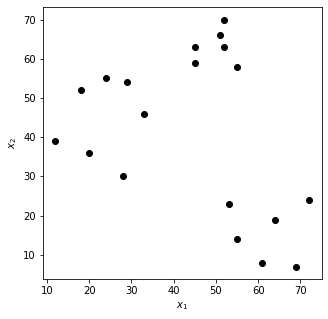

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Some previously geenerated random data in 2 dimensions
data = np.array([ [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
     [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]]).T

fig = plt.figure(figsize=(5, 5))
plt.scatter(data[:,0], data[:,1], color='k')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

In [2]:
# Initialize random centroids
centroids = 15 * np.random.randn(3,2) + 40

In [3]:
def cluster_plots(data, centroids,a,s):

  LABEL_COLOR_MAP = {0 : 'r', 1 : 'g', 2: 'b'}

  label_color = [LABEL_COLOR_MAP[l] for l in clusters]

  plt.scatter(data[:,0], data[:,1], color=label_color, s = 10, alpha = 0.2)
  plt.scatter(centroids[0,0], centroids[0,1], color='r', marker = 'X', s = s,alpha = a,edgecolors='black')
  plt.scatter(centroids[1,0], centroids[1,1], color='g', marker = 'X', s = s,alpha = a,edgecolors='black')
  plt.scatter(centroids[2,0], centroids[2,1], color='b', marker = 'X', s = s,alpha = a,edgecolors='black')

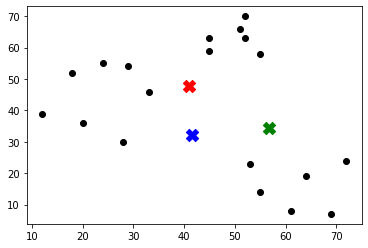

In [4]:
plt.scatter(data[:,0], data[:,1], color='k')
plt.scatter(centroids[0,0], centroids[0,1], color='r', marker = 'X', s = 150)
plt.scatter(centroids[1,0], centroids[1,1], color='g', marker = 'X', s = 150)
plt.scatter(centroids[2,0], centroids[2,1], color='b', marker = 'X', s = 150)
plt.show()


We define the function `closest_centroid`, which returns an array giving the index (0, 1, or 2) of the closest centroid for each datapoint. This function will tell us which centroid is closest. This function plays the same role as 

$$r_{n k}=\left\{\begin{array}{ll}
1 & \text { if } k=\arg \min _{j}\left\|\mathbf{x}_{n}-\boldsymbol{\mu}_{j}\right\|^{2} , \\
0 & \text { otherwise } .
\end{array}\right.$$

(although returning directly $k$, not the one-hot encoding).



In [5]:
def closest_centroid(k, data, centroids):
  classes = []
  for d in data:
    distances = []
    for i in range(k):
      distances.append(((d - centroids[i,:])**2).sum(axis = 0))
    #print(distances)
    min_distance = min(distances)
    classes.append(distances.index(min_distance))

  return classes

In [6]:
clusters = closest_centroid(3, data, centroids)
print(clusters)

[0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


We define the function `move_centroids` which returns the new values of the means i.e. centroids, given the previous assignments. This function is equivalent to
$$\boldsymbol{\mu}_{k}=\frac{\sum_{n} r_{n k} \mathbf{x}_{n}}{\sum_{n} r_{n k}}.$$

In [7]:
def move_centroids(data, closest, k):
  # returns the new centroids assigned from the points closest to them
  new_centroids = []
  for i in range(k):
    mask = (i == closest)
    cluster_points = data[mask]
    cluster_mean = cluster_points.sum(axis = 0)/(len(cluster_points)+0.00001)

    new_centroids.append(cluster_mean)

  return new_centroids

In [8]:
centroids

array([[40.92857763, 47.82981597],
       [56.65878742, 34.3954804 ],
       [41.64642383, 32.27175165]])

In [9]:
centroids = np.array(move_centroids(data, clusters, 3))


Now we decide on a termination criterion, and run our training loop. This is only a few steps.

for loop interupted after 4 iterations


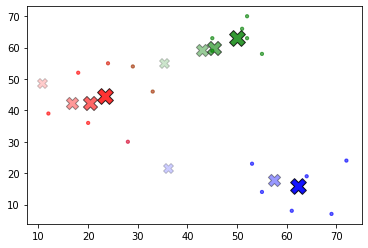

In [10]:
a = [0.2, 0.4, 0.6, 0.8, 1]
s = [100, 150, 200, 250, 300]
centroids = 15 * np.random.randn(3,2) + 40
for i in range(5):
  clusters = closest_centroid(3, data, centroids)
  clusters = np.array(clusters)
  cluster_plots(data, centroids, a[i], s[i])
  temp = centroids 
  centroids = np.array(move_centroids(data, clusters, 3))


# termination criterion

# For the termination criterion I choose to sum all the centroids and check if 
# this number is the same in the next iteration. If this is true it means that 
# the centroidis are the same and the algorithm have found the optimal centroidis. 

  if (temp.sum(axis = 1).sum(axis = 0) == centroids.sum(axis = 1).sum(axis = 0)):
    print('for loop interupted after '+str(i+1)+' iterations')
    break


We plot several plots stacked for the different centroids with different alpha in every iteration starting from low values to 1 in the final. In this way we can see the centroids 'move' in the same graph. 

By running numerous examples with different random inital centroid we can conclude that this algorithm can work properly if in each initial random centroid is assigned at least one data point. In this way in the next iteration the centroid can move tawards the cluster of the data point. In the case when no data point is assigned to one centroid (all the data points are assigned in the other two) the algorithm can not find all the clusters and just divide the data into two clusters leaving the third centroid in the same position in each itaration.    

Now we test our algorithm to a different dataset

In [11]:
!wget https://raw.githubusercontent.com/ChristiaanvA/ml4pha_datasets/main/data_mouse.csv

--2023-03-21 11:09:02--  https://raw.githubusercontent.com/ChristiaanvA/ml4pha_datasets/main/data_mouse.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99600 (97K) [text/plain]
Saving to: ‘data_mouse.csv.2’

data_mouse.csv.2    100%[===================>]  97.27K  --.-KB/s    in 0.02s   

2023-03-21 11:09:02 (5.96 MB/s) - ‘data_mouse.csv.2’ saved [99600/99600]



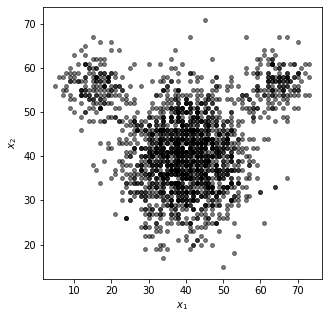

[0 0 0 ... 0 0 0]
[0 1 0 ... 2 0 0]
[0 1 0 ... 2 2 2]
[0 1 0 ... 2 2 2]
[0 1 0 ... 2 2 2]


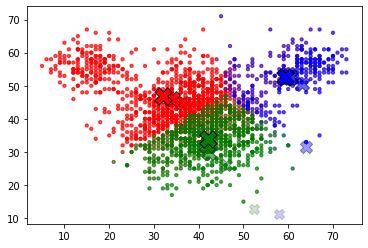

In [12]:
data_mouse = pd.read_csv('/content/data_mouse.csv')
data_mouse = data_mouse.to_numpy()

fig = plt.figure(figsize=(5, 5))
plt.scatter(data_mouse[:,0], data_mouse[:,1], color='k', s = 15, alpha = 0.5)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

centroids = 15 * np.random.randn(3,2) + 40
for i in range(5):
  clusters = closest_centroid(3, data_mouse, centroids)
  clusters = np.array(clusters)
  cluster_plots(data_mouse, centroids, a[i], s[i])
  print(clusters)

  centroids = np.array(move_centroids(data_mouse, clusters, 3))

We can't obtain good results in this situation. The cluster in the middle is much bigger than the other two and distance between the clusters is different however the algorithm can not recognise this pattern. The algorithm only takes account the distance of each point from the centroid and so devides the big cluster in 3 parts. This algorithm can be used if the amount of data in each cluster is approximately the same.